In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cosines

In [8]:
drugsim_baseline_cosine = pd.read_csv('drug_sim/baseline/LOOCV_cosines.csv')[['left_out_node', 'cosine_to_actual']]
drugsim_baseline_cosine.columns = ['drug', 'cosine_sim']
drugsim_baseline_cosine['vector_method'] = 'GCN baseline'
drugsim_baseline_cosine['neighbourhood_method'] = 'drug similarity'

bipartite_baseline_cosine = pd.read_csv('bipartite_gene/baseline/LOOCV_cosines.csv')[['left_out_node', 'cosine_to_actual']]
bipartite_baseline_cosine.columns = ['drug', 'cosine_sim']
bipartite_baseline_cosine['vector_method'] = 'GCN baseline'
bipartite_baseline_cosine['neighbourhood_method'] = 'bipartite projection'

chap4_cosine = pd.read_csv('../../../Chapter4/data/results/cosines_vs_actual.csv')
cosine_df = pd.concat([chap4_cosine, drugsim_baseline_cosine, bipartite_baseline_cosine])

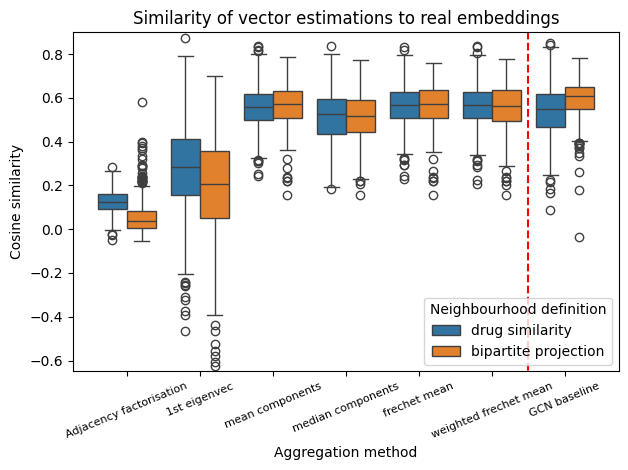

In [3]:
plt.clf()
sns.boxplot(data=cosine_df, y='cosine_sim', x='vector_method', hue='neighbourhood_method')
plt.title('Similarity of vector estimations to real embeddings')
plt.ylabel('Cosine similarity')
plt.xlabel('Aggregation method')
plt.legend(title='Neighbourhood definition', loc='lower right')
plt.xticks(size=8, rotation=22.5)
plt.ylim(-0.65, 0.9)
plt.tight_layout()
plt.vlines(x=5.5, ymin=-1, ymax=1.0, colors='red', linestyles='dashed')
plt.savefig('cosines_vs_chap4.png')

# Polypharmacy side effect prediction

In [6]:
drugsim_baseline_polySE = pd.read_csv('drug_sim/baseline/polySE_results.csv')
drugsim_baseline_polySE['vector_method'] = 'GCN baseline'
drugsim_baseline_polySE['neighbourhood_method'] = 'drug similarity'

bipartite_baseline_polySE = pd.read_csv('bipartite_gene/baseline/polySE_results.csv')
bipartite_baseline_polySE['vector_method'] = 'GCN baseline'
bipartite_baseline_polySE['neighbourhood_method'] = 'bipartite projection'

chap4_polySE = pd.read_csv('../../../Chapter4/data/results/polySE.csv')
polySE_df = pd.concat([chap4_polySE, drugsim_baseline_polySE, bipartite_baseline_polySE])

/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_59732/1660051580.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, size=8)


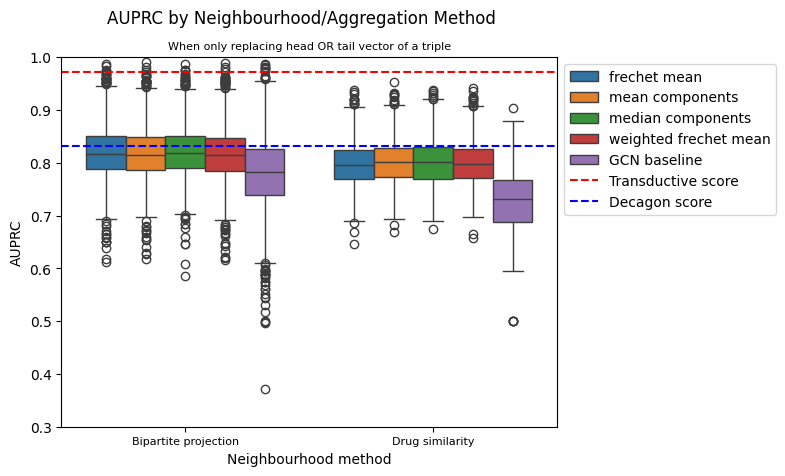

In [20]:
fig, ax = plt.subplots()
x = 'neighbourhood_method'
hue = 'vector_method'
sns.boxplot(polySE_df.query('fake_triple_component != "both"'), x=x, y='AUPRC', hue=hue)
plt.suptitle('AUPRC by Neighbourhood/Aggregation Method')

simple_score = 0.971
decagon_score = 0.832
xmin=-0.5
xmax = 1.5
ax.hlines(simple_score, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', label='Transductive score')
ax.hlines(decagon_score, xmin=xmin, xmax=xmax, colors='blue', linestyles='dashed', label='Decagon score')
ax.set_xlim(xmin, xmax)
ax.set_title('When only replacing head OR tail vector of a triple', size=8)
x_labels = [s.get_text().capitalize() for s in ax.get_xticklabels()]
ax.set_ylim(0.3, 1)
ax.set_xticklabels(x_labels, size=8)
ax.set_xlabel('Neighbourhood method')
ax.legend(bbox_to_anchor=(1, 1))

fig.savefig('polySE_warm_start_vs_chap4.png')

/var/folders/_x/2pk9s5z166x9c0h399wmby_h0000gp/T/ipykernel_59732/2960962410.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, size=8)


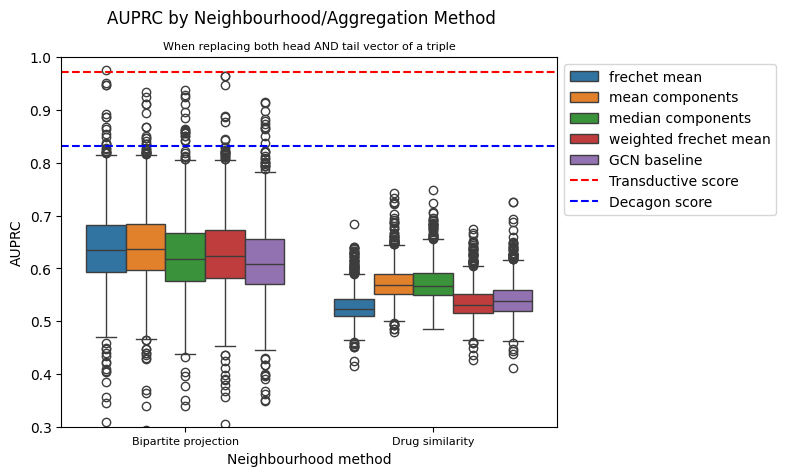

In [19]:
fig, ax = plt.subplots()
x = 'neighbourhood_method'
hue = 'vector_method'
sns.boxplot(polySE_df.query('fake_triple_component == "both"'), x=x, y='AUPRC', hue=hue)
plt.suptitle('AUPRC by Neighbourhood/Aggregation Method')

simple_score = 0.971
decagon_score = 0.832
xmin=-0.5
xmax = 1.5
ax.hlines(simple_score, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', label='Transductive score')
ax.hlines(decagon_score, xmin=xmin, xmax=xmax, colors='blue', linestyles='dashed', label='Decagon score')
ax.set_xlim(xmin, xmax)
ax.set_title('When replacing both head AND tail vector of a triple', size=8)
x_labels = [s.get_text().capitalize() for s in ax.get_xticklabels()]
ax.set_ylim(0.3, 1)
ax.set_xticklabels(x_labels, size=8)
ax.set_xlabel('Neighbourhood method')
ax.legend(bbox_to_anchor=(1, 1))

fig.savefig('polySE_cold_start_vs_chap4.png')